In [1]:
pip install pandas numpy scikit-learn xgboost matplotlib seaborn imbalanced-learn lifelines pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 22.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=ffae6aa81dd192b5b8b9d7ad8985139cb01afd851376bef0b411b83ba4c41b28
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


data

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

def generate_synthetic_data(num_players=50, years=5):
    # Player profiles
    player_data = []

    # Start date for the dataset
    start_date = datetime(2018, 1, 1)

    # Player generation
    for player_id in range(1, num_players + 1):
        # Basic player attributes
        age = random.randint(19, 32)
        height = random.randint(175, 200)  # cm
        weight = random.randint(70, 95)    # kg
        bowling_style = random.choice(['Right-arm fast', 'Right-arm fast-medium', 'Left-arm fast', 'Left-arm fast-medium'])

        # Generate player career tendency
        injury_prone = random.random() < 0.3  # 30% of players are injury-prone

        # Match schedule and workload
        current_date = start_date
        matches_played = 0

        while current_date < start_date + timedelta(days=365*years):
            # Simulate match
            match_type = random.choice(['Test', 'ODI', 'T20I', 'Domestic'])

            # Different workloads based on match type
            if match_type == 'Test':
                possible_overs = list(range(10, 26))
                match_days = 5
            elif match_type == 'ODI':
                possible_overs = list(range(6, 11))
                match_days = 1
            elif match_type == 'T20I':
                possible_overs = list(range(2, 5))
                match_days = 1
            else:  # Domestic
                possible_overs = list(range(5, 16))
                match_days = random.choice([1, 3, 4])

            # Assign bowling workload with some randomness
            overs_bowled = random.choice(possible_overs)

            # Calculate injury risk factors
            days_since_last_match = random.randint(3, 14)
            recent_workload = random.randint(10, 60)  # Overs in last 30 days

            # Fatigue factor increases with matches and decreases with rest
            fatigue_factor = min(0.9, matches_played * 0.01 - days_since_last_match * 0.005)
            if fatigue_factor < 0:
                fatigue_factor = 0

            # Performance metrics with some noise
            avg_speed = np.random.normal(138, 5)  # km/h
            max_speed = avg_speed + random.randint(5, 12)
            economy_rate = np.random.normal(4.2, 1.2)
            strike_rate = np.random.normal(45, 15)

            # Injury probability
            base_injury_probability = 0.05
            if injury_prone:
                base_injury_probability = 0.12

            injury_probability = base_injury_probability + (fatigue_factor * 0.3) + (recent_workload/100)

            # Determine if injury occurred
            injury_occurred = random.random() < injury_probability
            injury_type = None
            recovery_time = 0

            if injury_occurred:
                injury_types = {
                    'Stress fracture': (60, 120),
                    'Side strain': (21, 42),
                    'Hamstring': (14, 28),
                    'Ankle sprain': (10, 30),
                    'Back pain': (7, 21),
                    'Shoulder': (30, 90),
                    'Knee': (45, 180)
                }

                injury_type = random.choice(list(injury_types.keys()))
                min_days, max_days = injury_types[injury_type]
                recovery_time = random.randint(min_days, max_days)

            # Add entry to dataset
            player_data.append({
                'player_id': player_id,
                'date': current_date,
                'age': age + (current_date - start_date).days / 365,
                'height': height,
                'weight': weight,
                'bowling_style': bowling_style,
                'match_type': match_type,
                'overs_bowled': overs_bowled,
                'avg_speed': avg_speed,
                'max_speed': max_speed,
                'economy_rate': economy_rate,
                'strike_rate': strike_rate,
                'days_since_last_match': days_since_last_match,
                'recent_workload': recent_workload,
                'matches_played': matches_played,
                'injury_occurred': injury_occurred,
                'injury_type': injury_type,
                'recovery_time': recovery_time
            })

            # Update for next match
            matches_played += 1

            # If injured, add recovery time
            if injury_occurred:
                current_date += timedelta(days=recovery_time)
            else:
                # Normal match schedule
                current_date += timedelta(days=days_since_last_match + match_days)

    # Convert to DataFrame
    df = pd.DataFrame(player_data)
    return df

# Generate dataset
bowling_data = generate_synthetic_data(num_players=50, years=5)

# Show sample
print(f"Dataset shape: {bowling_data.shape}")
print(bowling_data.head())

# Save to CSV
bowling_data.to_csv('cricket_fast_bowler_dataset.csv', index=False)

Dataset shape: (3054, 18)
   player_id       date        age  height  weight   bowling_style match_type  \
0          1 2018-01-01  28.000000     180      74  Right-arm fast       T20I   
1          1 2018-01-11  28.027397     180      74  Right-arm fast        ODI   
2          1 2018-05-20  28.380822     180      74  Right-arm fast   Domestic   
3          1 2018-05-28  28.402740     180      74  Right-arm fast   Domestic   
4          1 2018-06-11  28.441096     180      74  Right-arm fast        ODI   

   overs_bowled   avg_speed   max_speed  economy_rate  strike_rate  \
0             3  146.057533  152.057533      3.964598    36.765986   
1            10  132.137352  143.137352      4.475127    40.831801   
2             8  133.445985  141.445985      5.065675    46.020861   
3             6  128.585152  137.585152      4.275899    58.250786   
4             9  139.300180  144.300180      3.208243    45.549689   

   days_since_last_match  recent_workload  matches_played  injury_

model

Classification Report:
              precision    recall  f1-score   support

       False       0.63      0.60      0.61       379
        True       0.62      0.65      0.64       385

    accuracy                           0.62       764
   macro avg       0.62      0.62      0.62       764
weighted avg       0.62      0.62      0.62       764



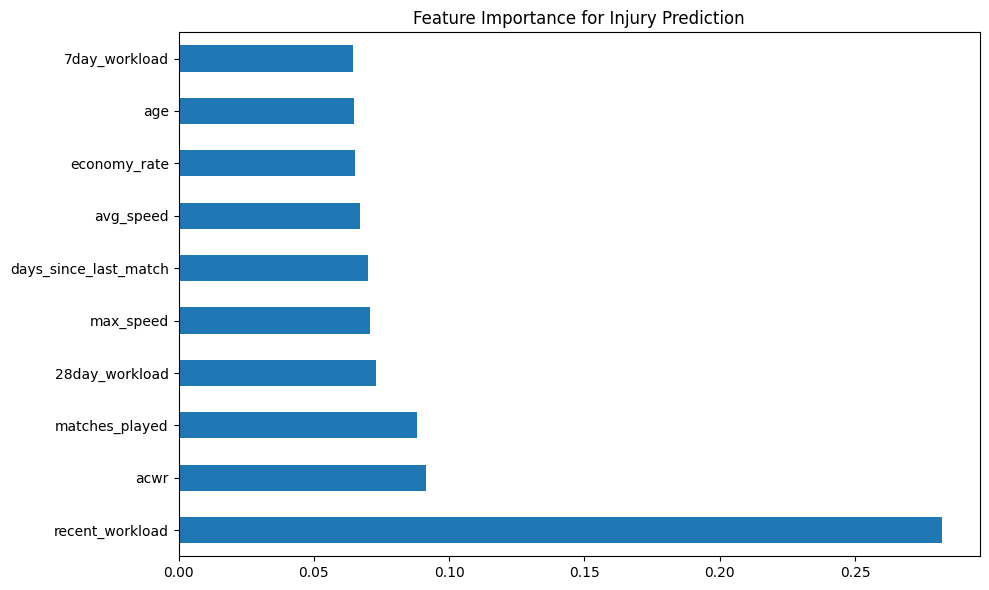

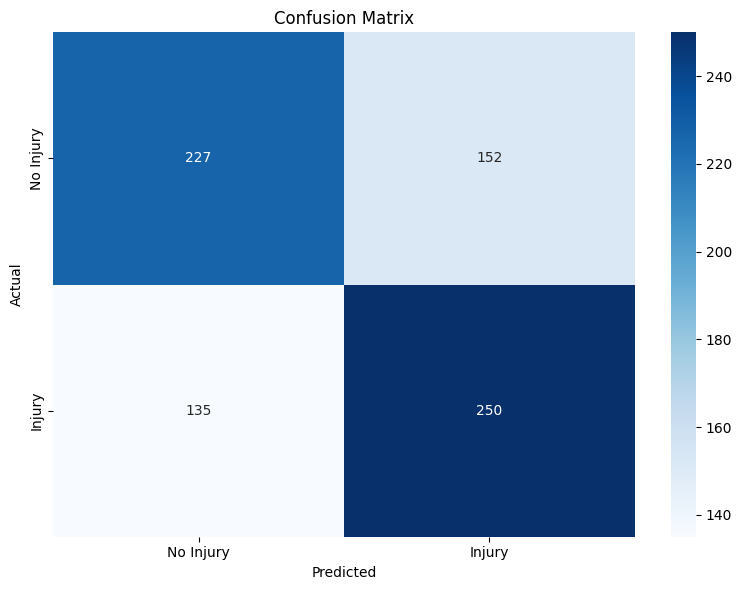

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('cricket_fast_bowler_dataset.csv')

# Feature engineering - create rolling workload features
df = df.sort_values(['player_id', 'date'])

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Create player-specific features
player_groups = df.groupby('player_id')

# Rolling workloads (7-day and 28-day)
workload_features = []

for player_id, player_data in player_groups:
    player_data = player_data.sort_values('date')

    # Calculate cumulative and rolling metrics
    player_data['cum_overs'] = player_data['overs_bowled'].cumsum()

    # Calculate acute:chronic workload ratio
    player_data['7day_workload'] = player_data['overs_bowled'].rolling(window=7, min_periods=1).sum()
    player_data['28day_workload'] = player_data['overs_bowled'].rolling(window=28, min_periods=1).sum() / 4

    # Safe division for ACWR (avoid division by zero)
    player_data['acwr'] = np.where(
        player_data['28day_workload'] > 0,
        player_data['7day_workload'] / player_data['28day_workload'],
        0
    )

    workload_features.append(player_data)

# Combine all players back
df = pd.concat(workload_features)

# Prepare features and target
features = [
    'age', 'overs_bowled', 'avg_speed', 'max_speed', 'economy_rate',
    'days_since_last_match', 'recent_workload', 'matches_played',
    '7day_workload', '28day_workload', 'acwr'
]

X = df[features]
y = df['injury_occurred']

# Handle missing values
X = X.fillna(0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
model = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1),  # For class imbalance
    learning_rate=0.01,
    n_estimators=200,
    max_depth=4,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot feature importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model.feature_importances_, index=features)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance for Injury Prediction')
plt.tight_layout()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Injury', 'Injury'],
            yticklabels=['No Injury', 'Injury'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

prediction

In [ ]:
# Function to predict injury risk
def predict_injury_risk(player_data, model, scaler):
    # Ensure player_data has the same features as training data
    player_features = scaler.transform(player_data[features])

    # Get prediction probability
    risk_probability = model.predict_proba(player_features)[:, 1]

    # Categorize risk levels
    risk_levels = []
    for prob in risk_probability:
        if prob < 0.3:
            risk_levels.append('Low Risk')
        elif prob < 0.6:
            risk_levels.append('Medium Risk')
        else:
            risk_levels.append('High Risk')

    return risk_probability, risk_levels

# Example usage with new player data
new_player = pd.DataFrame({
    'age': [24.5],
    'overs_bowled': [22],
    'avg_speed': [140.2],
    'max_speed': [148.5],
    'economy_rate': [3.8],
    'days_since_last_match': [5],
    'recent_workload': [45],
    'matches_played': [12],
    '7day_workload': [22],
    '28day_workload': [15],
    'acwr': [1.47]
})

risk_prob, risk_level = predict_injury_risk(new_player, model, scaler)
print(f"Injury Risk Probability: {risk_prob[0]:.2f}")
print(f"Risk Level: {risk_level[0]}")

Injury Risk Probability: 0.53
Risk Level: Medium Risk


single player

data

In [ ]:
import pdfplumber
import pandas as pd

# Path to the uploaded PDF file
pdf_path = "/content/shami_odi_stats.pdf"  # Update based on your Colab upload location

# Initialize an empty list to store extracted data
data = []

with pdfplumber.open("/content/shami_odi_stats.pdf") as pdf:
    for page in pdf.pages:
        text = page.extract_text()
        if text:
            lines = text.split("\n")
            for line in lines:
                # Extract columns based on structure
                cols = line.split()  # Adjust based on actual format
                if len(cols) >= 9:  # Ensure it has enough values
                    try:
                        overs, mdns, runs, wkts, econ, avg, sr, opp, ground, *start_date = cols
                        data.append([overs, mdns, runs, wkts, econ, avg, sr, opp, ground, " ".join(start_date)])
                    except ValueError:
                        continue  # Skip incorrect rows

# Convert to DataFrame with proper column names
columns = ["Overs", "Maidens", "Runs", "Wickets", "Economy", "Average", "Strike Rate", "Opposition", "Ground", "Start Date"]
df = pd.DataFrame(data, columns=columns)

# Convert numeric columns to proper data types
numeric_cols = ["Overs", "Maidens", "Runs", "Wickets", "Economy", "Average", "Strike Rate"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Convert Date column to datetime format with the correct format
df["Start Date"] = pd.to_datetime(df["Start Date"], format='%d %b %Y', errors='coerce')

# Remove empty columns
df = df.dropna(axis=1, how='all')

# Save DataFrame to CSV (Optional)
df.to_csv("shami_odi_stats.csv", index=False)

# Display extracted data
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/shami_odi_stats.pdf'

model

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Dataset (Assuming CSV conversion from PDF stats)
df = pd.read_csv("shami_odi_stats.csv")  # Convert PDF to structured CSV format

# Feature Engineering
df['Match_Date'] = pd.to_datetime(df['Start Date'])
df = df.sort_values(by='Match_Date')

df['Days_Since_Last_Match'] = df['Match_Date'].diff().dt.days.fillna(0)
df['Bowling_Workload'] = df['Overs'] + (df['Runs'] / 30) + (df['Wickets'] * 3)  # Linking Overs, Runs & Wickets
df['Fatigue_Index'] = df['Bowling_Workload'].rolling(window=3).mean().fillna(0)

df['Injury_Next_Match'] = ((df['Bowling_Workload'] > df['Bowling_Workload'].quantile(0.75)) &
                            (df['Days_Since_Last_Match'] < 4)).astype(int)

features = ['Days_Since_Last_Match', 'Bowling_Workload', 'Fatigue_Index']
X = df[features]
y = df['Injury_Next_Match']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost Model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# LSTM Model (For Time-Series Approach)
X_train_seq = np.array(X_train_scaled).reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_seq = np.array(X_test_scaled).reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, len(features))),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_seq, y_train, epochs=20, batch_size=8, verbose=1)

y_pred_lstm = (lstm_model.predict(X_test_seq) > 0.5).astype(int)
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))



# Prediction Example
def predict_injury(next_match_data):
    data_scaled = scaler.transform([next_match_data])
    xgb_pred = int(xgb_model.predict(data_scaled)[0])
    lstm_pred = int((lstm_model.predict(data_scaled.reshape((1, 1, len(features)))) > 0.5).astype(int)[0][0])
    return {"XGBoost Prediction": xgb_pred, "LSTM Prediction": lstm_pred}

# Example Prediction
next_match_features = [3, 50, 45]  # Days since last match, Workload, Fatigue Index
print(predict_injury(next_match_features))


XGBoost Accuracy: 1.0
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7450 - loss: nan
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7212 - loss: nan
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7606 - loss: nan
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7237 - loss: nan
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7287 - loss: nan
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7423 - loss: nan
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7165 - loss: nan
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7860 - loss: nan
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7515 - loss: nan
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7183 - loss: nan
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7606 - loss: nan
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7347 - loss: nan
Epoch 13/20
20/20 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


prediction

In [ ]:
import pandas as pd
import joblib
import tensorflow as tf

# Load trained models and scaler
xgb_model = joblib.load("xgb_model.pkl")
scaler = joblib.load("scaler.pkl")
lstm_model = tf.keras.models.load_model("lstm_model.h5", compile=False)

# Load dataset
df = pd.read_csv("shami_odi_stats.csv")
df['Match_Date'] = pd.to_datetime(df['Start Date'])

# Feature Engineering (Recreating features for prediction)
df['Days_Since_Last_Match'] = df['Match_Date'].diff().dt.days.fillna(0)
df['Bowling_Workload'] = df['Overs'] + (df['Runs'] / 30) + (df['Wickets'] * 3)
df['Fatigue_Index'] = df['Bowling_Workload'].rolling(window=3).mean().fillna(0)

# Convert 'Start Date' to datetime properly
df['Match_Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

# Check if any rows still have NaT (missing dates)
missing_dates = df[df['Match_Date'].isna()]
print("Rows with missing dates:", missing_dates)

# If 'Start Date' is missing, try filling with a default or forward-fill
df['Match_Date'].fillna(method='ffill', inplace=True)  # Fills missing dates with previous row's date


# Now you have the features, you can proceed with scaling and prediction
# Prepare features for the entire dataset
features = ['Days_Since_Last_Match', 'Bowling_Workload', 'Fatigue_Index']
X_scaled = scaler.transform(df[features])

# Run predictions for all matches
xgb_preds = xgb_model.predict(X_scaled)
lstm_preds = (lstm_model.predict(X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))) > 0.5).astype(int).flatten()

# Identify matches where either model predicts injury
df['Injury_Predicted'] = (xgb_preds == 1) | (lstm_preds == 1)

# Filter and display matches predicted as injury-prone
injury_matches = df[df['Injury_Predicted'] == 1][['Match_Date', 'Opposition', 'Ground', 'Overs', 'Bowling_Workload', 'Fatigue_Index']]
print(injury_matches)

# Save results to CSV (optional)
injury_matches.to_csv("predicted_injury_matches.csv", index=False)

Rows with missing dates:      Overs  Maidens  Runs  Wickets  Economy  Average  Strike Rate  Opposition  \
0      NaN      NaN   NaN      NaN      NaN      NaN          NaN  Opposition   
1      9.0      4.0  23.0      1.0     2.55     23.0         54.0         ODI   
2      4.0      1.0  24.0      1.0     6.00     24.0         24.0         ODI   
3      8.0      0.0  23.0      1.0     2.87     23.0         48.0         ODI   
4      8.0      0.0  58.0      0.0     7.25      NaN          NaN         ODI   
..     ...      ...   ...      ...      ...      ...          ...         ...   
193   10.0      0.0  53.0      5.0     5.30     10.6         12.0         ODI   
194    8.0      0.0  43.0      0.0     5.37      NaN          NaN         ODI   
195    4.0      0.0  15.0      0.0     3.75      NaN          NaN         ODI   
196   10.0      0.0  48.0      3.0     4.80     16.0         20.0         ODI   
197    9.0      0.0  74.0      1.0     8.22     74.0         54.0         ODI   

  

<ipython-input-43-1939857a8121>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Match_Date'].fillna(method='ffill', inplace=True)  # Fills missing dates with previous row's date
<ipython-input-43-1939857a8121>:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Match_Date'].fillna(method='ffill', inplace=True)  # Fills missing dates with previous row's date


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
    Match_Date Opposition Ground  Overs  Bowling_Workload  Fatigue_Index
78         NaT       T20I      v    3.0          4.533333      13.077778
104        NaT        ODI      v    6.0         10.433333      14.344444
115        NaT        ODI      v    3.0          3.166667      14.911111
129        NaT        ODI      v    7.4          9.333333      14.044444
140        NaT       T20I      v    4.0          5.533333      13.644444
159        NaT        ODI      v    7.0          8.266667      13.300000
186        NaT        ODI      v    6.0          7.366667      12.855556
195        NaT        ODI      v    4.0          4.500000      13.566667


trial2_data

In [3]:
import pdfplumber
import pandas as pd
import re

def extract_match_data(pdf_path):
    # Initialize an empty list to store extracted data
    pdf_path="/content/new_dataset_shami.pdf"
    data = []

    # Open the PDF and extract text
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            # Extract text and split into lines
            text = page.extract_text()
            if text:
                # Split text into lines and process each line
                lines = text.split("\n")
                for line in lines:
                    # Clean up the line and remove extra whitespaces
                    line = line.strip()

                    # Use regex to match the pattern: date followed by match details
                    match = re.match(r'^(\d{2}/\d{2}/\d{2})\s+([^\d]+)\s+([\d.]+)\s+(\d+)\s+(\d+)\s+(\d+)(?:\s+([\d.]+))?', line)

                    if match:
                        try:
                            # Extract matched groups
                            date = match.group(1)
                            match_teams = match.group(2).strip()
                            overs = float(match.group(3))
                            runs = int(match.group(4))
                            wick = int(match.group(5))  # Renamed from Maidens to Wick
                            mdns = int(match.group(6))  # Renamed from Wickets to Mdns

                            # Economy rate might be optional
                            economy = float(match.group(7)) if match.group(7) else None

                            # Skip 'DNB' (Did Not Bowl) entries
                            if match_teams.upper() != 'DNB':
                                data.append([
                                    date,
                                    match_teams,
                                    overs,
                                    runs,
                                    wick,  # Wick instead of Maidens
                                    mdns,  # Mdns instead of Wickets
                                    economy
                                ])
                        except (ValueError, IndexError) as e:
                            # Optional: print problematic lines for debugging
                            print(f"Skipping line: {line}")
                            print(f"Error: {e}")

    # Convert to DataFrame with proper column names
    columns = ["Date", "Match", "Overs", "Runs", "Wick", "Mdns", "Economy"]  # Updated column names
    df = pd.DataFrame(data, columns=columns)

    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

    # Convert numeric columns to proper data types
    numeric_cols = ["Overs", "Runs", "Wick", "Mdns", "Economy"]
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Sort by date
    df = df.sort_values('Date', ascending=False)

    return df

# Path to the PDF file
pdf_path = "new_dataset_shami.pdf"

# Extract data
df = extract_match_data(pdf_path)

# Save DataFrame to CSV
df.to_csv("shami_cricket_data.csv", index=False)

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Total matches: {len(df)}")

print("\nFirst few rows:")
print(df.head())

print("\nSummary Statistics:")
print(df[["Overs", "Runs", "Wick", "Mdns", "Economy"]].describe())

# Optional: Additional insights
print("\nMatches by Year:")
print(df.groupby(df['Date'].dt.year).size())

print("\nTop 5 Matches with Most Mdns (Previously Wickets):")
print(df.nlargest(5, 'Wick')[['Date', 'Match', 'Wick']])


Dataset Overview:
Total matches: 269

First few rows:
        Date       Match  Overs  Runs  Wick  Mdns  Economy
0 2025-03-23   SRH vs RR    3.0    33     1     0    11.00
1 2025-03-09   IND vs NZ    9.0    74     1     0     8.22
2 2025-03-04  IND vs AUS   10.0    48     3     0     4.80
3 2025-03-02   IND vs NZ    4.0    15     0     0     3.75
4 2025-02-23  IND vs PAK    8.0    43     0     0     5.37

Summary Statistics:
            Overs        Runs        Wick        Mdns     Economy
count  269.000000  269.000000  269.000000  269.000000  269.000000
mean     5.733457   37.513011    1.483271    0.252788    7.153829
std      2.745389   16.278042    1.291728    0.665825    2.732492
min      1.000000    5.000000    0.000000    0.000000    1.660000
25%      4.000000   26.000000    1.000000    0.000000    5.100000
50%      4.000000   36.000000    1.000000    0.000000    6.900000
75%      8.000000   47.000000    2.000000    0.000000    9.000000
max     17.000000   96.000000    7.000000  

trial2_model


In [5]:
import pandas as pd
import numpy as np
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# Ensure model directory exists in /mnt/data
model_dir = "/mnt/data/models"
os.makedirs(model_dir, exist_ok=True)

# Load dataset
data_path = "/content/shami_cricket_data.csv"
df = pd.read_csv(data_path)

# Feature Engineering
def engineer_features(dataframe):
    dataframe['Match_Date'] = pd.to_datetime(dataframe['Date'])
    dataframe = dataframe.sort_values(by='Match_Date')

    dataframe['Days_Since_Last_Match'] = dataframe['Match_Date'].diff().dt.days.fillna(0)

    dataframe['Bowling_Intensity'] = (
        (dataframe['Overs'] * 6) +
        (dataframe['Runs'] * 2) +
        (dataframe['Wick'] * 20)
    )

    dataframe['Cumulative_Workload'] = dataframe['Bowling_Intensity'].rolling(window=3, min_periods=1).mean()
    dataframe['Workload_Variance'] = dataframe['Bowling_Intensity'].rolling(window=3, min_periods=1).std()

    workload_threshold = dataframe['Bowling_Intensity'].quantile(0.75)
    recovery_threshold = 5
    variance_threshold = dataframe['Workload_Variance'].quantile(0.75)

    dataframe['Injury_Risk'] = (
        (dataframe['Bowling_Intensity'] > workload_threshold) &
        (dataframe['Days_Since_Last_Match'] < recovery_threshold) &
        (dataframe['Workload_Variance'] > variance_threshold)
    ).astype(int)

    return dataframe

df_processed = engineer_features(df)

# Features and Target
features = ['Overs', 'Runs', 'Wick', 'Days_Since_Last_Match', 'Bowling_Intensity', 'Cumulative_Workload', 'Workload_Variance']
X = df_processed[features]
y = df_processed['Injury_Risk']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, f"{model_dir}/scaler.pkl")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train XGBoost Model
def train_xgboost(X, y):
    xgb_model_path = f"{model_dir}/xgboost_model.pkl"

    if os.path.exists(xgb_model_path):
        print("Loading existing XGBoost model...")
        return joblib.load(xgb_model_path)

    xgb_params = {
        'objective': 'binary:logistic',
        'learning_rate': 0.1,
        'max_depth': 5,
        'n_estimators': 100,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'random_state': 42
    }

    xgb_classifier = xgb.XGBClassifier(**xgb_params)
    cv_scores = cross_val_score(xgb_classifier, X, y, cv=cv, scoring='f1')

    xgb_classifier.fit(X, y)
    joblib.dump(xgb_classifier, xgb_model_path)

    print(f"XGBoost Model saved to {xgb_model_path}")
    print("XGBoost Cross-Validation Results:")
    print(f"Avg F1 Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nFull Dataset Performance:")
    print(classification_report(y, xgb_classifier.predict(X)))

    return xgb_classifier

# Train LSTM Model
def train_lstm(X, y):
    lstm_model_path = f"{model_dir}/lstm_model.h5"

    if os.path.exists(lstm_model_path):
        print("Loading existing LSTM model...")
        return tf.keras.models.load_model(lstm_model_path)

    X_lstm = X.reshape((X.shape[0], 1, X.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

    model = Sequential([
        LSTM(64, activation='relu', input_shape=(1, X.shape[1]), return_sequences=True),
        Dropout(0.3),
        LSTM(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    model.save(lstm_model_path)
    print(f"LSTM Model saved to {lstm_model_path}")

    return model

# Prediction Function
def predict_injury_risk(match_data):
    scaler = joblib.load(f"{model_dir}/scaler.pkl")
    match_data = np.array(match_data).reshape(1, -1)
    scaled_data = scaler.transform(match_data)

    xgb_model = joblib.load(f"{model_dir}/xgboost_model.pkl")
    lstm_model = tf.keras.models.load_model(f"{model_dir}/lstm_model.h5")

    xgb_pred_prob = xgb_model.predict_proba(scaled_data)[0][1]
    lstm_scaled_data = scaled_data.reshape((1, 1, scaled_data.shape[1]))
    lstm_pred_prob = lstm_model.predict(lstm_scaled_data)[0][0]

    return {
        "XGBoost Injury Risk Probability": float(xgb_pred_prob),
        "LSTM Injury Risk Probability": float(lstm_pred_prob)
    }

# Main Training Function
def main():
    print("Training Models...")
    xgb_model = train_xgboost(X_scaled, y)
    lstm_model = train_lstm(X_scaled, y)

    print("\nSample Predictions:")
    for match in X_scaled[np.random.choice(len(X_scaled), 3, replace=False)]:
        print("\nMatch Features:", match)
        print(predict_injury_risk(match))

if __name__ == "__main__":
    main()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training Models...
Loading existing XGBoost model...
Loading existing LSTM model...

Sample Predictions:

Match Features: [-0.63258372  0.09151964 -0.37482503 -0.30043202 -0.29881405 -0.71228763
 -0.87320771]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'XGBoost Injury Risk Probability': 0.001648249919526279, 'LSTM Injury Risk Probability': nan}

Match Features: [ 0.0972684   0.33770747 -0.37482503 -0.30043202  0.05083569  0.39712142
 -0.38966838]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'XGBoost Injury Risk Probability': 0.001648249919526279, 'LSTM Injury Risk Probability': nan}

Match Features: [-0.63258372  0.21461355  1.17637396 -0.28080214  0.47041538 -0.14335992
 -0.43001191]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
{'XGBoost Injury Risk Probability': 0.001648249919526279, 'LSTM Injury Risk Probability': nan}


prediction2

In [6]:
import pandas as pd
import joblib
import tensorflow as tf

# Load trained models and scaler
xgb_model = joblib.load("/mnt/data/models/xgboost_model.pkl")
scaler = joblib.load("/mnt/data/models/scaler.pkl")
lstm_model = tf.keras.models.load_model("/mnt/data/models/lstm_model.h5", compile=False)

# Load dataset
file_path = "/content/shami_cricket_data.csv"
df = pd.read_csv(file_path)

# Convert date column to datetime format
df['Match_Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Handle missing dates
df['Match_Date'].fillna(method='ffill', inplace=True)  # Fill missing dates using forward fill

# Feature Engineering - Ensure the features match those used during training
df['Days_Since_Last_Match'] = df['Match_Date'].diff().dt.days.fillna(0)
df['Bowling_Intensity'] = (df['Overs'] * 6) + (df['Runs'] * 2) + (df['Wick'] * 20)
df['Cumulative_Workload'] = df['Bowling_Intensity'].rolling(window=3, min_periods=1).mean()
df['Workload_Variance'] = df['Bowling_Intensity'].rolling(window=3, min_periods=1).std()

# Define features for prediction - Use the correct features from training
features = ['Overs', 'Runs', 'Wick', 'Days_Since_Last_Match', 'Bowling_Intensity', 'Cumulative_Workload', 'Workload_Variance']
X_scaled = scaler.transform(df[features])

# Make predictions
xgb_preds = xgb_model.predict(X_scaled)
lstm_preds = (lstm_model.predict(X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))) > 0.5).astype(int).flatten()

# Identify high injury risk matches
df['Injury_Predicted'] = (xgb_preds == 1) | (lstm_preds == 1)

# Filter and display injury-prone matches
injury_matches = df[df['Injury_Predicted'] == 1][['Match_Date', 'Match', 'Overs', 'Bowling_Intensity', 'Cumulative_Workload', 'Workload_Variance']]  # Adjusted columns
print(injury_matches)

# Save results to CSV (optional)
injury_matches.to_csv("/mnt/data/predicted_injury_matches.csv", index=False)

<ipython-input-6-60054f5bd67c>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Match_Date'].fillna(method='ffill', inplace=True)  # Fill missing dates using forward fill
<ipython-input-6-60054f5bd67c>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Match_Date'].fillna(method='ffill', inplace=True)  # Fill missing dates using forward fill


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
    Match_Date                    Match  Overs  Bowling_Intensity  \
1   2025-03-09                IND vs NZ    9.0              222.0   
2   2025-03-04               IND vs AUS   10.0              216.0   
5   2025-02-20               IND vs BAN   10.0              266.0   
6   2025-02-09               IND vs ENG    7.5              197.0   
11  2023-11-15                IND vs NZ    9.5              311.0   
16  2023-10-22                IND vs NZ   10.0              268.0   
18  2023-09-22               IND vs AUS   10.0              262.0   
92  2020-11-29               IND vs AUS    9.0              220.0   
93  2020-11-27               IND vs AUS   10.0              238.0   
108 2020-02-05                IND vs NZ    9.1              200.6   
112 2020-01-19               IND vs AUS   10.0              266.0   
113 2020-01-17               IND vs AUS   10.0              274.0   
115 2019-12-22                IND vs WI   10.0              212.0

shaun_tait_data

In [7]:
import pdfplumber
import pandas as pd
import re

def extract_match_data(pdf_path):
    # Initialize an empty list to store extracted data
    pdf_path="/content/shaun_tait_stats.pdf"
    data = []

    # Open the PDF and extract text
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            # Extract text and split into lines
            text = page.extract_text()
            if text:
                # Split text into lines and process each line
                lines = text.split("\n")
                for line in lines:
                    # Clean up the line and remove extra whitespaces
                    line = line.strip()

                    # Use regex to match the pattern: date followed by match details
                    match = re.match(r'^(\d{2}/\d{2}/\d{2})\s+([^\d]+)\s+([\d.]+)\s+(\d+)\s+(\d+)\s+(\d+)(?:\s+([\d.]+))?', line)

                    if match:
                        try:
                            # Extract matched groups
                            date = match.group(1)
                            match_teams = match.group(2).strip()
                            overs = float(match.group(3))
                            runs = int(match.group(4))
                            wick = int(match.group(5))  # Renamed from Maidens to Wick
                            mdns = int(match.group(6))  # Renamed from Wickets to Mdns

                            # Economy rate might be optional
                            economy = float(match.group(7)) if match.group(7) else None

                            # Skip 'DNB' (Did Not Bowl) entries
                            if match_teams.upper() != 'DNB':
                                data.append([
                                    date,
                                    match_teams,
                                    overs,
                                    runs,
                                    wick,  # Wick instead of Maidens
                                    mdns,  # Mdns instead of Wickets
                                    economy
                                ])
                        except (ValueError, IndexError) as e:
                            # Optional: print problematic lines for debugging
                            print(f"Skipping line: {line}")
                            print(f"Error: {e}")

    # Convert to DataFrame with proper column names
    columns = ["Date", "Match", "Overs", "Runs", "Wick", "Mdns", "Economy"]  # Updated column names
    df = pd.DataFrame(data, columns=columns)

    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

    # Convert numeric columns to proper data types
    numeric_cols = ["Overs", "Runs", "Wick", "Mdns", "Economy"]
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Sort by date
    df = df.sort_values('Date', ascending=False)

    return df

# Path to the PDF file
pdf_path = "/content/shaun_tait_stats.pdf"

# Extract data
df = extract_match_data(pdf_path)

# Save DataFrame to CSV
df.to_csv("shaun_tait_data.csv", index=False)

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Total matches: {len(df)}")

print("\nFirst few rows:")
print(df.head())

print("\nSummary Statistics:")
print(df[["Overs", "Runs", "Wick", "Mdns", "Economy"]].describe())

# Optional: Additional insights
print("\nMatches by Year:")
print(df.groupby(df['Date'].dt.year).size())

print("\nTop 5 Matches with Most Wickets:")
print(df.nlargest(5, 'Wick')[['Date', 'Match', 'Wick']])


Dataset Overview:
Total matches: 160

First few rows:
        Date          Match  Overs  Runs  Wick  Mdns  Economy
0 2017-01-08     HBH vs SYT    2.0    32     0     0    16.00
1 2016-12-30     HBH vs BRH    3.0    34     1     0    11.33
2 2016-12-26     HBH vs MLS    4.0    56     0     0    14.00
3 2016-12-23     HBH vs SYS    3.2    32     3     0     9.60
4 2016-08-11  GLAM vs YORKS    4.0    34     1     0     8.50

Summary Statistics:
            Overs        Runs        Wick        Mdns     Economy
count  160.000000  160.000000  160.000000  160.000000  160.000000
mean     4.755000   33.025000    1.443750    0.100000    7.487125
std      2.191545   12.172735    1.131298    0.340181    2.587328
min      1.000000   10.000000    0.000000    0.000000    2.600000
25%      4.000000   25.000000    0.750000    0.000000    5.707500
50%      4.000000   30.500000    1.000000    0.000000    7.055000
75%      4.000000   39.250000    2.000000    0.000000    9.250000
max     10.000000   68.00

shaun_tait_model


In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# Ensure model directory exists in /mnt/data
model_dir = "/mnt/data/models"
os.makedirs(model_dir, exist_ok=True)

# Load dataset
data_path = "/content/shaun_tait_data.csv"
df = pd.read_csv(data_path)

# Feature Engineering
def engineer_features(dataframe):
    dataframe['Match_Date'] = pd.to_datetime(dataframe['Date'])
    dataframe = dataframe.sort_values(by='Match_Date')

    dataframe['Days_Since_Last_Match'] = dataframe['Match_Date'].diff().dt.days.fillna(0)

    dataframe['Bowling_Intensity'] = (
        (dataframe['Overs'] * 6) +
        (dataframe['Runs'] * 2) +
        (dataframe['Wick'] * 20)
    )

    dataframe['Cumulative_Workload'] = dataframe['Bowling_Intensity'].rolling(window=3, min_periods=1).mean()
    dataframe['Workload_Variance'] = dataframe['Bowling_Intensity'].rolling(window=3, min_periods=1).std()

    workload_threshold = dataframe['Bowling_Intensity'].quantile(0.75)
    recovery_threshold = 5
    variance_threshold = dataframe['Workload_Variance'].quantile(0.75)

    dataframe['Injury_Risk'] = (
        (dataframe['Bowling_Intensity'] > workload_threshold) &
        (dataframe['Days_Since_Last_Match'] < recovery_threshold) &
        (dataframe['Workload_Variance'] > variance_threshold)
    ).astype(int)

    return dataframe

df_processed = engineer_features(df)

# Features and Target
features = ['Overs', 'Runs', 'Wick', 'Days_Since_Last_Match', 'Bowling_Intensity', 'Cumulative_Workload', 'Workload_Variance']
X = df_processed[features]
y = df_processed['Injury_Risk']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, f"{model_dir}/scaler2.pkl")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train XGBoost Model
def train_xgboost(X, y):
    xgb_model_path = f"{model_dir}/xgboost_model2.pkl"

    if os.path.exists(xgb_model_path):
        print("Loading existing XGBoost model...")
        return joblib.load(xgb_model_path)

    xgb_params = {
        'objective': 'binary:logistic',
        'learning_rate': 0.1,
        'max_depth': 5,
        'n_estimators': 100,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'random_state': 42
    }

    xgb_classifier = xgb.XGBClassifier(**xgb_params)
    cv_scores = cross_val_score(xgb_classifier, X, y, cv=cv, scoring='f1')

    xgb_classifier.fit(X, y)
    joblib.dump(xgb_classifier, xgb_model_path)

    print(f"XGBoost Model saved to {xgb_model_path}")
    print("XGBoost Cross-Validation Results:")
    print(f"Avg F1 Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nFull Dataset Performance:")
    print(classification_report(y, xgb_classifier.predict(X)))

    return xgb_classifier

# Train LSTM Model
def train_lstm(X, y):
    lstm_model_path = f"{model_dir}/lstm_model2.h5"

    if os.path.exists(lstm_model_path):
        print("Loading existing LSTM model...")
        return tf.keras.models.load_model(lstm_model_path)

    X_lstm = X.reshape((X.shape[0], 1, X.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

    model = Sequential([
        LSTM(64, activation='relu', input_shape=(1, X.shape[1]), return_sequences=True),
        Dropout(0.3),
        LSTM(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    model.save(lstm_model_path)
    print(f"LSTM Model saved to {lstm_model_path}")

    return model

# Prediction Function
def predict_injury_risk(match_data):
    scaler = joblib.load(f"{model_dir}/scaler2.pkl")
    match_data = np.array(match_data).reshape(1, -1)
    scaled_data = scaler.transform(match_data)

    xgb_model = joblib.load(f"{model_dir}/xgboost_model2.pkl")
    lstm_model = tf.keras.models.load_model(f"{model_dir}/lstm_model2.h5")

    xgb_pred_prob = xgb_model.predict_proba(scaled_data)[0][1]
    lstm_scaled_data = scaled_data.reshape((1, 1, scaled_data.shape[1]))
    lstm_pred_prob = lstm_model.predict(lstm_scaled_data)[0][0]

    return {
        "XGBoost Injury Risk Probability": float(xgb_pred_prob),
        "LSTM Injury Risk Probability": float(lstm_pred_prob)
    }

# Main Training Function
def main():
    print("Training Models...")
    xgb_model = train_xgboost(X_scaled, y)
    lstm_model = train_lstm(X_scaled, y)

    print("\nSample Predictions:")
    for match in X_scaled[np.random.choice(len(X_scaled), 3, replace=False)]:
        print("\nMatch Features:", match)
        print(predict_injury_risk(match))

if __name__ == "__main__":
    main()


Training Models...
XGBoost Model saved to /mnt/data/models/xgboost_model2.pkl
XGBoost Cross-Validation Results:
Avg F1 Score: 0.3333 (+/- 0.8433)

Full Dataset Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       1.00      0.86      0.92         7

    accuracy                           0.99       160
   macro avg       1.00      0.93      0.96       160
weighted avg       0.99      0.99      0.99       160



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


LSTM Model saved to /mnt/data/models/lstm_model2.h5

Sample Predictions:

Match Features: [-0.80331935 -0.49651265 -1.28019596 -0.35983355 -1.23142972 -1.46095914
 -1.04217845]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'XGBoost Injury Risk Probability': 0.0032163222786039114, 'LSTM Injury Risk Probability': nan}

Match Features: [ 2.40080341  0.6572097   1.37995149 -0.25543941  1.87975217  1.02630947
  1.34924555]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'XGBoost Injury Risk Probability': 0.0032163222786039114, 'LSTM Injury Risk Probability': nan}

Match Features: [ 1.02760794  0.16275726  1.37995149 -0.34243452  1.16178711  0.86242772
 -0.21431754]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
{'XGBoost Injury Risk Probability': 0.0032163222786039114, 'LSTM Injury Risk Probability': nan}


shaun_tait_prediction*

In [9]:
import pandas as pd
import joblib
import tensorflow as tf

# Load trained models and scaler
xgb_model = joblib.load("/mnt/data/models/xgboost_model2.pkl")
scaler = joblib.load("/mnt/data/models/scaler2.pkl")
lstm_model = tf.keras.models.load_model("/mnt/data/models/lstm_model2.h5", compile=False)

# Load dataset
file_path = "/content/shaun_tait_data.csv"
df = pd.read_csv(file_path)

# Convert date column to datetime format
df['Match_Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Handle missing dates
df['Match_Date'].fillna(method='ffill', inplace=True)  # Fill missing dates using forward fill

# Feature Engineering - Ensure the features match those used during training
df['Days_Since_Last_Match'] = df['Match_Date'].diff().dt.days.fillna(0)
df['Bowling_Intensity'] = (df['Overs'] * 6) + (df['Runs'] * 2) + (df['Wick'] * 20)
df['Cumulative_Workload'] = df['Bowling_Intensity'].rolling(window=3, min_periods=1).mean()
df['Workload_Variance'] = df['Bowling_Intensity'].rolling(window=3, min_periods=1).std()

# Define features for prediction - Use the correct features from training
features = ['Overs', 'Runs', 'Wick', 'Days_Since_Last_Match', 'Bowling_Intensity', 'Cumulative_Workload', 'Workload_Variance']
X_scaled = scaler.transform(df[features])

# Make predictions
xgb_preds = xgb_model.predict(X_scaled)
lstm_preds = (lstm_model.predict(X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))) > 0.5).astype(int).flatten()

# Identify high injury risk matches
df['Injury_Predicted'] = (xgb_preds == 1) | (lstm_preds == 1)

# Filter and display injury-prone matches
injury_matches = df[df['Injury_Predicted'] == 1][['Match_Date', 'Match', 'Overs', 'Bowling_Intensity', 'Cumulative_Workload', 'Workload_Variance']]  # Adjusted columns
print(injury_matches)

# Save results to CSV (optional)
injury_matches.to_csv("/mnt/data/predicted_injury_matches2.csv", index=False)

<ipython-input-9-e9f9c1c58415>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Match_Date'].fillna(method='ffill', inplace=True)  # Fill missing dates using forward fill
<ipython-input-9-e9f9c1c58415>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Match_Date'].fillna(method='ffill', inplace=True)  # Fill missing dates using forward fill


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
    Match_Date       Match  Overs  Bowling_Intensity  Cumulative_Workload  \
49  2014-10-11  SAUS vs QL    8.0              212.0           135.333333   
102 2011-02-06  AUS vs ENG    8.0              204.0           162.666667   
103 2011-02-02  AUS vs ENG   10.0              218.0           181.333333   
113 2010-07-03  AUS vs ENG    8.3              225.8           145.933333   
115 2010-06-27  AUS vs ENG   10.0              176.0           169.933333   
143 2007-12-14   AUS vs NZ   10.0              238.0           174.000000   
146 2007-04-25  AUS vs RSA   10.0              218.0           148.666667   
149 2007-04-13  AUS vs IRE    6.0              174.0           190.000000   
152 2007-03-27   AUS vs WI    7.3              169.8           157.266667   
153 2007-03-24  AUS vs RSA   10.0              222.0           163.933333   
155 2007-03-14  AUS vs SCO    8.0              178.0           173.333333   
156 2007-02-20   AUS vs NZ   10.0    

umran_malik_dataset

In [10]:
import pdfplumber
import pandas as pd
import re

def extract_match_data(pdf_path):
    # Initialize an empty list to store extracted data
    pdf_path="/content/umran_malik.pdf"
    data = []

    # Open the PDF and extract text
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            # Extract text and split into lines
            text = page.extract_text()
            if text:
                # Split text into lines and process each line
                lines = text.split("\n")
                for line in lines:
                    # Clean up the line and remove extra whitespaces
                    line = line.strip()

                    # Use regex to match the pattern: date followed by match details
                    match = re.match(r'^(\d{2}/\d{2}/\d{2})\s+([^\d]+)\s+([\d.]+)\s+(\d+)\s+(\d+)\s+(\d+)(?:\s+([\d.]+))?', line)

                    if match:
                        try:
                            # Extract matched groups
                            date = match.group(1)
                            match_teams = match.group(2).strip()
                            overs = float(match.group(3))
                            runs = int(match.group(4))
                            wick = int(match.group(5))  # Renamed from Maidens to Wick
                            mdns = int(match.group(6))  # Renamed from Wickets to Mdns

                            # Economy rate might be optional
                            economy = float(match.group(7)) if match.group(7) else None

                            # Skip 'DNB' (Did Not Bowl) entries
                            if match_teams.upper() != 'DNB':
                                data.append([
                                    date,
                                    match_teams,
                                    overs,
                                    runs,
                                    wick,  # Wick instead of Maidens
                                    mdns,  # Mdns instead of Wickets
                                    economy
                                ])
                        except (ValueError, IndexError) as e:
                            # Optional: print problematic lines for debugging
                            print(f"Skipping line: {line}")
                            print(f"Error: {e}")

    # Convert to DataFrame with proper column names
    columns = ["Date", "Match", "Overs", "Runs", "Wick", "Mdns", "Economy"]  # Updated column names
    df = pd.DataFrame(data, columns=columns)

    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

    # Convert numeric columns to proper data types
    numeric_cols = ["Overs", "Runs", "Wick", "Mdns", "Economy"]
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Sort by date
    df = df.sort_values('Date', ascending=False)

    return df

# Path to the PDF file
pdf_path = "/content/umran_malik_stats.pdf"

# Extract data
df = extract_match_data(pdf_path)

# Save DataFrame to CSV
df.to_csv("umran_malik_data.csv", index=False)

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Total matches: {len(df)}")

print("\nFirst few rows:")
print(df.head())

print("\nSummary Statistics:")
print(df[["Overs", "Runs", "Wick", "Mdns", "Economy"]].describe())

# Optional: Additional insights
print("\nMatches by Year:")
print(df.groupby(df['Date'].dt.year).size())

print("\nTop 5 Matches with Most Wickets:")
print(df.nlargest(5, 'Wick')[['Date', 'Match', 'Wick']])


Dataset Overview:
Total matches: 56

First few rows:
        Date       Match  Overs  Runs  Wick  Mdns  Economy
0 2023-10-27  JAM vs CHA    4.0    39     1     0     9.75
1 2023-10-25  JAM vs MIZ    4.0    27     3     0     6.75
2 2023-10-23  JAM vs MEG    4.0    19     0     0     4.75
3 2023-10-21  JAM vs MUM    4.0    28     0     0     7.00
4 2023-10-19  JAM vs HAR    4.0    46     1     0    11.50

Summary Statistics:
           Overs       Runs       Wick       Mdns    Economy
count  56.000000  56.000000  56.000000  56.000000  56.000000
mean    3.842857  32.517857   1.250000   0.053571   9.213571
std     1.872466  13.752343   1.282753   0.296626   3.661191
min     1.000000   9.000000   0.000000   0.000000   3.250000
25%     3.000000  22.750000   0.000000   0.000000   6.750000
50%     4.000000  29.000000   1.000000   0.000000   8.125000
75%     4.000000  42.250000   2.000000   0.000000  11.500000
max    10.000000  66.000000   5.000000   2.000000  22.000000

Matches by Year:
Date


umran_malik_model

In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# Ensure model directory exists in /mnt/data
model_dir = "/mnt/data/models"
os.makedirs(model_dir, exist_ok=True)

# Load dataset
data_path = "/content/umran_malik_data.csv"
df = pd.read_csv(data_path)

# Feature Engineering
def engineer_features(dataframe):
    dataframe['Match_Date'] = pd.to_datetime(dataframe['Date'])
    dataframe = dataframe.sort_values(by='Match_Date')

    dataframe['Days_Since_Last_Match'] = dataframe['Match_Date'].diff().dt.days.fillna(0)

    dataframe['Bowling_Intensity'] = (
        (dataframe['Overs'] * 6) +
        (dataframe['Runs'] * 2) +
        (dataframe['Wick'] * 20)
    )

    dataframe['Cumulative_Workload'] = dataframe['Bowling_Intensity'].rolling(window=3, min_periods=1).mean()
    dataframe['Workload_Variance'] = dataframe['Bowling_Intensity'].rolling(window=3, min_periods=1).std()

    workload_threshold = dataframe['Bowling_Intensity'].quantile(0.75)
    recovery_threshold = 5
    variance_threshold = dataframe['Workload_Variance'].quantile(0.75)

    dataframe['Injury_Risk'] = (
        (dataframe['Bowling_Intensity'] > workload_threshold) &
        (dataframe['Days_Since_Last_Match'] < recovery_threshold) &
        (dataframe['Workload_Variance'] > variance_threshold)
    ).astype(int)

    return dataframe

df_processed = engineer_features(df)

# Features and Target
features = ['Overs', 'Runs', 'Wick', 'Days_Since_Last_Match', 'Bowling_Intensity', 'Cumulative_Workload', 'Workload_Variance']
X = df_processed[features]
y = df_processed['Injury_Risk']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, f"{model_dir}/scaler3.pkl")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train XGBoost Model
def train_xgboost(X, y):
    xgb_model_path = f"{model_dir}/xgboost_model3.pkl"

    if os.path.exists(xgb_model_path):
        print("Loading existing XGBoost model...")
        return joblib.load(xgb_model_path)

    xgb_params = {
        'objective': 'binary:logistic',
        'learning_rate': 0.1,
        'max_depth': 5,
        'n_estimators': 100,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'random_state': 42
    }

    xgb_classifier = xgb.XGBClassifier(**xgb_params)
    cv_scores = cross_val_score(xgb_classifier, X, y, cv=cv, scoring='f1')

    xgb_classifier.fit(X, y)
    joblib.dump(xgb_classifier, xgb_model_path)

    print(f"XGBoost Model saved to {xgb_model_path}")
    print("XGBoost Cross-Validation Results:")
    print(f"Avg F1 Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print("\nFull Dataset Performance:")
    print(classification_report(y, xgb_classifier.predict(X)))

    return xgb_classifier

# Train LSTM Model
def train_lstm(X, y):
    lstm_model_path = f"{model_dir}/lstm_model3.h5"

    if os.path.exists(lstm_model_path):
        print("Loading existing LSTM model...")
        return tf.keras.models.load_model(lstm_model_path)

    X_lstm = X.reshape((X.shape[0], 1, X.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

    model = Sequential([
        LSTM(64, activation='relu', input_shape=(1, X.shape[1]), return_sequences=True),
        Dropout(0.3),
        LSTM(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    model.save(lstm_model_path)
    print(f"LSTM Model saved to {lstm_model_path}")

    return model

# Prediction Function
def predict_injury_risk(match_data):
    scaler = joblib.load(f"{model_dir}/scaler3.pkl")
    match_data = np.array(match_data).reshape(1, -1)
    scaled_data = scaler.transform(match_data)

    xgb_model = joblib.load(f"{model_dir}/xgboost_model3.pkl")
    lstm_model = tf.keras.models.load_model(f"{model_dir}/lstm_model3.h5")

    xgb_pred_prob = xgb_model.predict_proba(scaled_data)[0][1]
    lstm_scaled_data = scaled_data.reshape((1, 1, scaled_data.shape[1]))
    lstm_pred_prob = lstm_model.predict(lstm_scaled_data)[0][0]

    return {
        "XGBoost Injury Risk Probability": float(xgb_pred_prob),
        "LSTM Injury Risk Probability": float(lstm_pred_prob)
    }

# Main Training Function
def main():
    print("Training Models...")
    xgb_model = train_xgboost(X_scaled, y)
    lstm_model = train_lstm(X_scaled, y)

    print("\nSample Predictions:")
    for match in X_scaled[np.random.choice(len(X_scaled), 3, replace=False)]:
        print("\nMatch Features:", match)
        print(predict_injury_risk(match))

if __name__ == "__main__":
    main()


Training Models...
XGBoost Model saved to /mnt/data/models/xgboost_model3.pkl
XGBoost Cross-Validation Results:
Avg F1 Score: 0.0000 (+/- 0.0000)

Full Dataset Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.80      0.89         5

    accuracy                           0.98        56
   macro avg       0.99      0.90      0.94        56
weighted avg       0.98      0.98      0.98        56



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


LSTM Model saved to /mnt/data/models/lstm_model3.h5

Sample Predictions:

Match Features: [ 0.08468243 -0.33148849 -0.98328573 -0.43896761 -0.69491468 -0.63219367
  0.08484059]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'XGBoost Injury Risk Probability': 0.015138575807213783, 'LSTM Injury Risk Probability': 7.430501577848337e-28}

Match Features: [-0.45420576 -1.06521796 -0.98328573 -0.24751756 -1.24088692 -0.51121345
 -0.05290337]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'XGBoost Injury Risk Probability': 0.015138575807213783, 'LSTM Injury Risk Probability': 6.554265203280987e-29}

Match Features: [ 0.08468243  0.03537624 -0.19665715  2.47107313 -0.0649467  -1.03546107
 -0.51671655]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
{'XGBoost Injury Risk Probability': 0.015138575807213783, 'LSTM Injury Risk Probability': 1.146272457480308e-25}


umran_malik_prediction

In [12]:
import pandas as pd
import joblib
import tensorflow as tf

# Load trained models and scaler
xgb_model = joblib.load("/mnt/data/models/xgboost_model3.pkl")
scaler = joblib.load("/mnt/data/models/scaler3.pkl")
lstm_model = tf.keras.models.load_model("/mnt/data/models/lstm_model3.h5", compile=False)

# Load dataset
file_path = "/content/umran_malik_data.csv"
df = pd.read_csv(file_path)

# Convert date column to datetime format
df['Match_Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Handle missing dates
df['Match_Date'].fillna(method='ffill', inplace=True)  # Fill missing dates using forward fill

# Feature Engineering - Ensure the features match those used during training
df['Days_Since_Last_Match'] = df['Match_Date'].diff().dt.days.fillna(0)
df['Bowling_Intensity'] = (df['Overs'] * 6) + (df['Runs'] * 2) + (df['Wick'] * 20)
df['Cumulative_Workload'] = df['Bowling_Intensity'].rolling(window=3, min_periods=1).mean()
df['Workload_Variance'] = df['Bowling_Intensity'].rolling(window=3, min_periods=1).std()

# Define features for prediction - Use the correct features from training
features = ['Overs', 'Runs', 'Wick', 'Days_Since_Last_Match', 'Bowling_Intensity', 'Cumulative_Workload', 'Workload_Variance']
X_scaled = scaler.transform(df[features])

# Make predictions
xgb_preds = xgb_model.predict(X_scaled)
lstm_preds = (lstm_model.predict(X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))) > 0.5).astype(int).flatten()

# Identify high injury risk matches
df['Injury_Predicted'] = (xgb_preds == 1) | (lstm_preds == 1)

# Filter and display injury-prone matches
injury_matches = df[df['Injury_Predicted'] == 1][['Match_Date', 'Match', 'Overs', 'Bowling_Intensity', 'Cumulative_Workload', 'Workload_Variance']]  # Adjusted columns
print(injury_matches)

# Save results to CSV (optional)
injury_matches.to_csv("/mnt/data/predicted_injury_matches3.csv", index=False)

<ipython-input-12-c59ed2b531e4>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Match_Date'].fillna(method='ffill', inplace=True)  # Fill missing dates using forward fill
<ipython-input-12-c59ed2b531e4>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Match_Date'].fillna(method='ffill', inplace=True)  # Fill missing dates using forward fill


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
   Match_Date        Match  Overs  Bowling_Intensity  Cumulative_Workload  \
20 2023-01-12    IND vs SL    7.0              178.0           127.333333   
23 2023-01-05    IND vs SL    4.0              180.0           174.000000   
28 2022-11-25    IND vs NZ   10.0              232.0           186.666667   
29 2022-10-14   JAM vs MAH    4.0              158.0           167.333333   
43 2022-04-17  SRH vs PBKS    4.0              160.0           134.666667   

    Workload_Variance  
20          77.597251  
23          51.264022  
28          65.156223  
29          60.541996  
43          56.438757  
